In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# trade data ( don't know how to analyze trade data yet)
day = 0
trade = pd.read_csv(f'round-2-island-data-bottle/trades_round_2_day_{day}.csv',sep=';')
products = trade.symbol.unique()
print(products)
trade.head(10)

['CROISSANTS' 'DJEMBES' 'RAINFOREST_RESIN' 'KELP' 'SQUID_INK' 'JAMS'
 'PICNIC_BASKET1' 'PICNIC_BASKET2']


,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,CROISSANTS,SEASHELLS,4322.0,8
1,0,NaN,NaN,DJEMBES,SEASHELLS,13494.0,3
2,100,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10002.0,1
3,300,NaN,NaN,KELP,SEASHELLS,2029.0,6
4,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,2
5,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1
6,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6
7,500,NaN,NaN,JAMS,SEASHELLS,6631.0,10
8,500,NaN,NaN,KELP,SEASHELLS,2031.0,1
9,500,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10004.0,1


In [3]:
price = pd.DataFrame()
for day in [-1,0,1]:
    price_day = pd.read_csv(f'round-2-island-data-bottle/prices_round_2_day_{day}.csv',sep=';')
    price = pd.concat([price,price_day])
price.head()
price.fillna(0,inplace=True)
price['timestamp'] = price['timestamp']/100 + price['day'] * 10000 + 10000
price.set_index('timestamp',inplace=True)
# 计算盘口中间价
price['mid_depth_price'] = (price['bid_price_1'] * price['bid_volume_1'] + price['bid_price_2']*price['bid_volume_2'] + price['bid_price_3']*price['bid_volume_3'] 
                            + price['ask_price_1']*price['ask_volume_1'] + price['ask_price_2']*price['ask_volume_2'] + price['ask_price_3']*price['ask_volume_3']
                            )/(
                                price['bid_volume_1']+price['bid_volume_2']+price['bid_volume_3']+price['ask_volume_1']+price['ask_volume_2']+price['ask_volume_3'])
price['return'] = price.groupby('product')['mid_depth_price'].pct_change()
price.head(20)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mid_depth_price,return
timestamp,,,,,,,,,,,,,,,,,,
0.0,-1,CROISSANTS,4304,112,0.0,0.0,0.0,0.0,4305,112,0.0,0.0,0.0,0.0,4304.5,0.0,4304.500000,NaN
0.0,-1,JAMS,6670,66,6669.0,137.0,0.0,0.0,6671,66,6672.0,137.0,0.0,0.0,6670.5,0.0,6670.500000,NaN
0.0,-1,SQUID_INK,2005,1,2002.0,31.0,0.0,0.0,2006,31,0.0,0.0,0.0,0.0,2005.5,0.0,2004.015873,NaN
0.0,-1,PICNIC_BASKET1,59284,20,59283.0,18.0,0.0,0.0,59294,2,59295.0,36.0,0.0,0.0,59289.0,0.0,59289.236842,NaN
0.0,-1,PICNIC_BASKET2,30606,20,30605.0,18.0,0.0,0.0,30612,20,30613.0,18.0,0.0,0.0,30609.0,0.0,30609.000000,NaN
0.0,-1,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,0.0,0.0,10003.0,0.0,10000.031746,NaN
0.0,-1,DJEMBES,13450,55,0.0,0.0,0.0,0.0,13451,55,0.0,0.0,0.0,0.0,13450.5,0.0,13450.500000,NaN
0.0,-1,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,0.0,0.0,0.0,0.0,2028.5,0.0,2027.047619,NaN
1.0,-1,PICNIC_BASKET1,59282,17,59281.0,20.0,0.0,0.0,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0,59287.472973,-0.000030


In [4]:
# 计算最大可能收益
for product in products:
    product_price = price[price['product'] == product]
    product_max_return = (product_price[product_price['return'] >= 0]['return'] + 1).cumprod().iloc[-1]
    print(f"{product} max return: {product_max_return}")

CROISSANTS max return: 2.0609957456656787
DJEMBES max return: 1.8170937322931364
RAINFOREST_RESIN max return: 1.5598652161450233
KELP max return: 2.8651171000294675
SQUID_INK max return: 1531.728525479666
JAMS max return: 1.911167189272327
PICNIC_BASKET1 max return: 2.229477110548764
PICNIC_BASKET2 max return: 2.5096311794055097


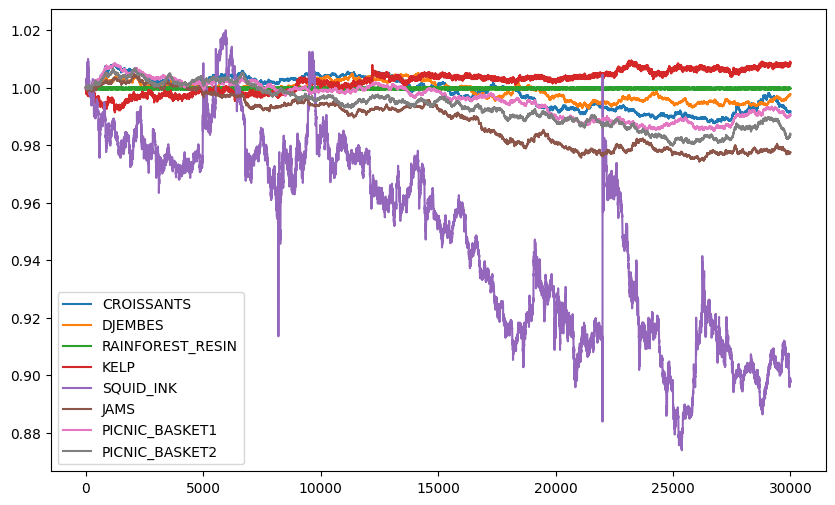

In [18]:
import plotly.graph_objects as go

fig = go.Figure()
for product in products:
    product_price = price[price['product'] == product]
    fig.add_trace(
        go.Scatter(
            x=product_price.index,
            y=product_price['mid_price'] / product_price['mid_price'].iloc[0],
            name=product,
            mode='lines'
        )
    )

fig.update_layout(
    title='产品价格走势',
    xaxis_title='时间',
    yaxis_title='相对价格',
    showlegend=True
)

fig.show()

In [6]:
returns_df = price.pivot(columns='product', values='return')
returns_df.corr()

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
product,,,,,,,,
CROISSANTS,1.000000,0.007217,0.008575,0.001208,0.412652,0.464182,-0.004069,-0.008484
DJEMBES,0.007217,1.000000,-0.005602,0.000208,0.202661,-0.008721,0.000540,0.006525
JAMS,0.008575,-0.005602,1.000000,-0.003906,0.297715,0.341752,0.009132,-0.006447
KELP,0.001208,0.000208,-0.003906,1.000000,-0.001370,0.003641,-0.003302,0.003604
PICNIC_BASKET1,0.412652,0.202661,0.297715,-0.001370,1.000000,0.343211,-0.002943,-0.009884
PICNIC_BASKET2,0.464182,-0.008721,0.341752,0.003641,0.343211,1.000000,0.003662,-0.002737
RAINFOREST_RESIN,-0.004069,0.000540,0.009132,-0.003302,-0.002943,0.003662,1.000000,-0.001508
SQUID_INK,-0.008484,0.006525,-0.006447,0.003604,-0.009884,-0.002737,-0.001508,1.000000


In [7]:
price_df = price.pivot(columns='product', values='mid_depth_price')
price_df.corr()

product,CROISSANTS,DJEMBES,JAMS,KELP,PICNIC_BASKET1,PICNIC_BASKET2,RAINFOREST_RESIN,SQUID_INK
product,,,,,,,,
CROISSANTS,1.000000,0.840319,0.885355,-0.753912,0.950033,0.907520,0.004168,0.828932
DJEMBES,0.840319,1.000000,0.820142,-0.611133,0.819292,0.738512,0.007101,0.747882
JAMS,0.885355,0.820142,1.000000,-0.852907,0.946340,0.953215,0.007079,0.879598
KELP,-0.753912,-0.611133,-0.852907,1.000000,-0.834762,-0.882046,-0.003697,-0.761675
PICNIC_BASKET1,0.950033,0.819292,0.946340,-0.834762,1.000000,0.955922,0.005395,0.818713
PICNIC_BASKET2,0.907520,0.738512,0.953215,-0.882046,0.955922,1.000000,0.003684,0.868703
RAINFOREST_RESIN,0.004168,0.007101,0.007079,-0.003697,0.005395,0.003684,1.000000,0.003230
SQUID_INK,0.828932,0.747882,0.879598,-0.761675,0.818713,0.868703,0.003230,1.000000


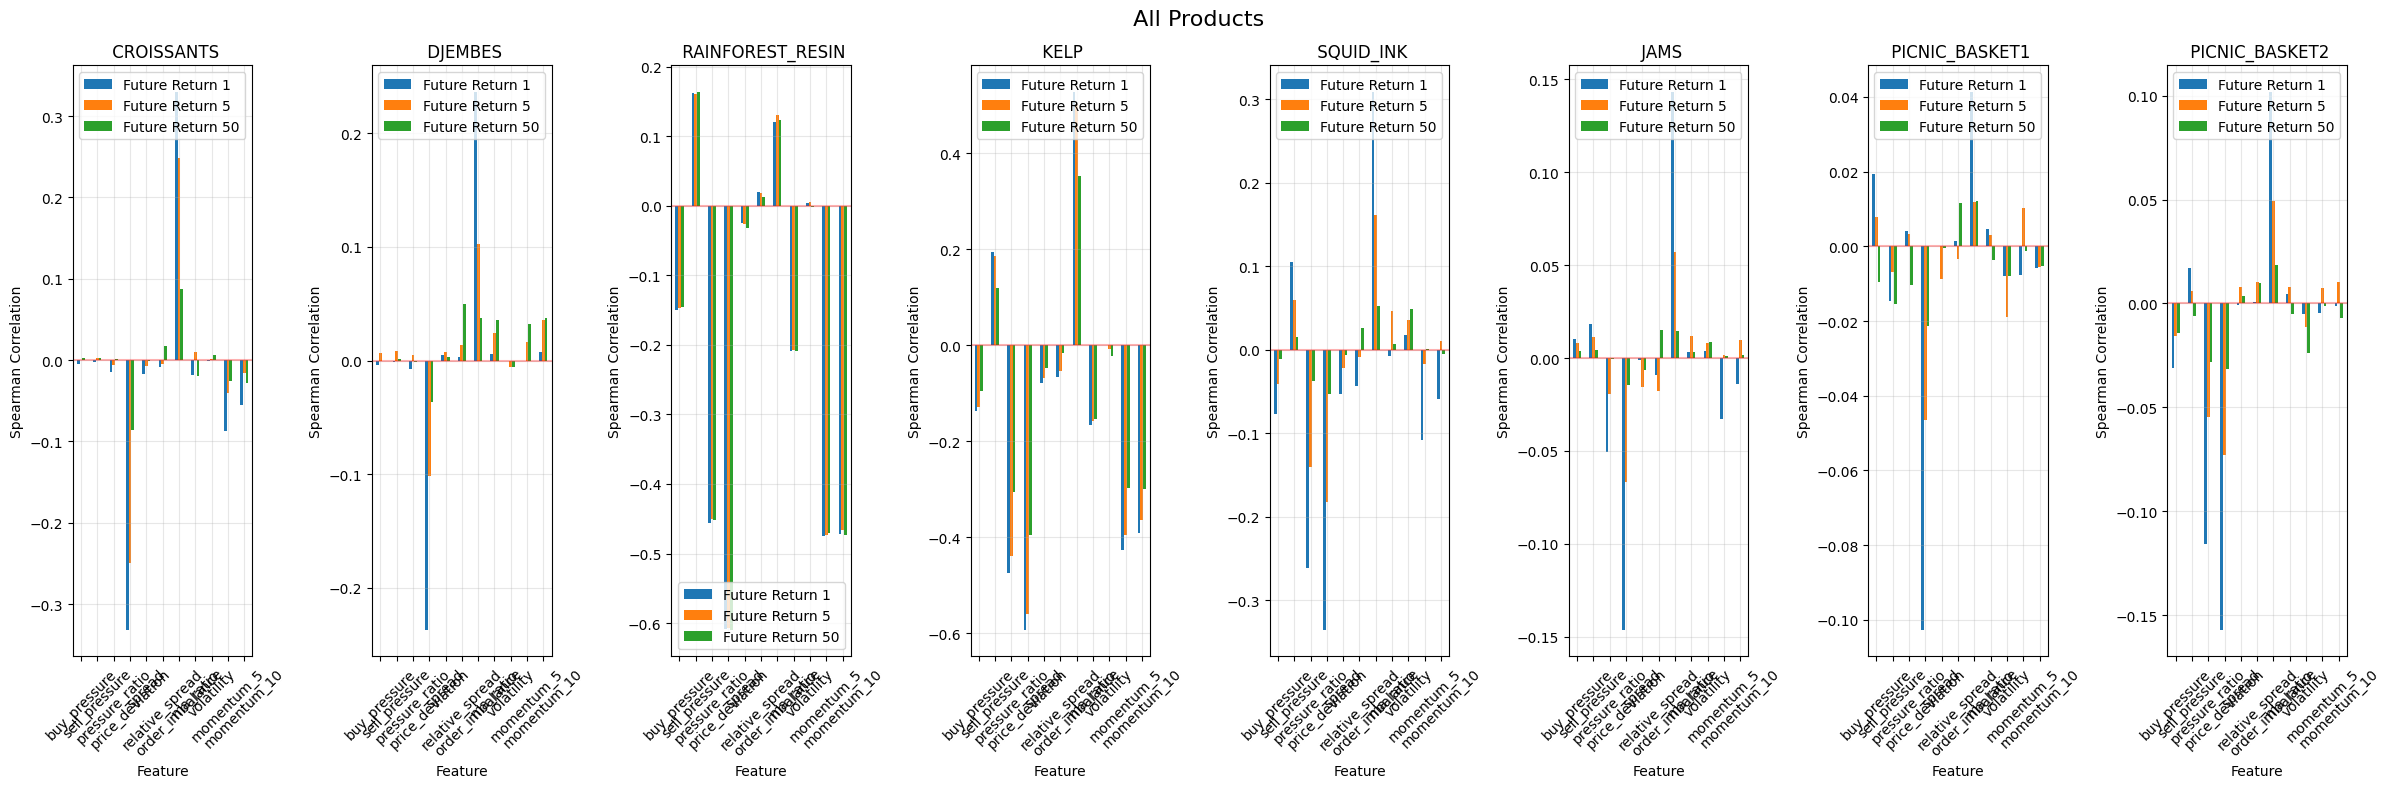


Average IC Across All Products:
                 Future Return 1  Future Return 5 Future Return 10  \
Feature                                                              
buy_pressure           -0.046877        -0.038575              NaN   
sell_pressure           0.059834         0.053348              NaN   
pressure_ratio         -0.171795        -0.137838              NaN   
price_deviation        -0.313671        -0.236006              NaN   
spread                 -0.021322        -0.016699              NaN   
relative_spread        -0.012822        -0.005891              NaN   
order_imbalance         0.225826         0.157915              NaN   
ma_ratio               -0.047806        -0.032653              NaN   
volatility              0.001292         0.000864              NaN   
momentum_5             -0.142594        -0.111506              NaN   
momentum_10            -0.123986        -0.098463              NaN   

                 Future Return 50  
Feature             

/tmp/ipykernel_108808/748339485.py:153: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avg_ic_df = pd.concat([avg_ic_df, pd.DataFrame({


<Figure size 1200x800 with 0 Axes>

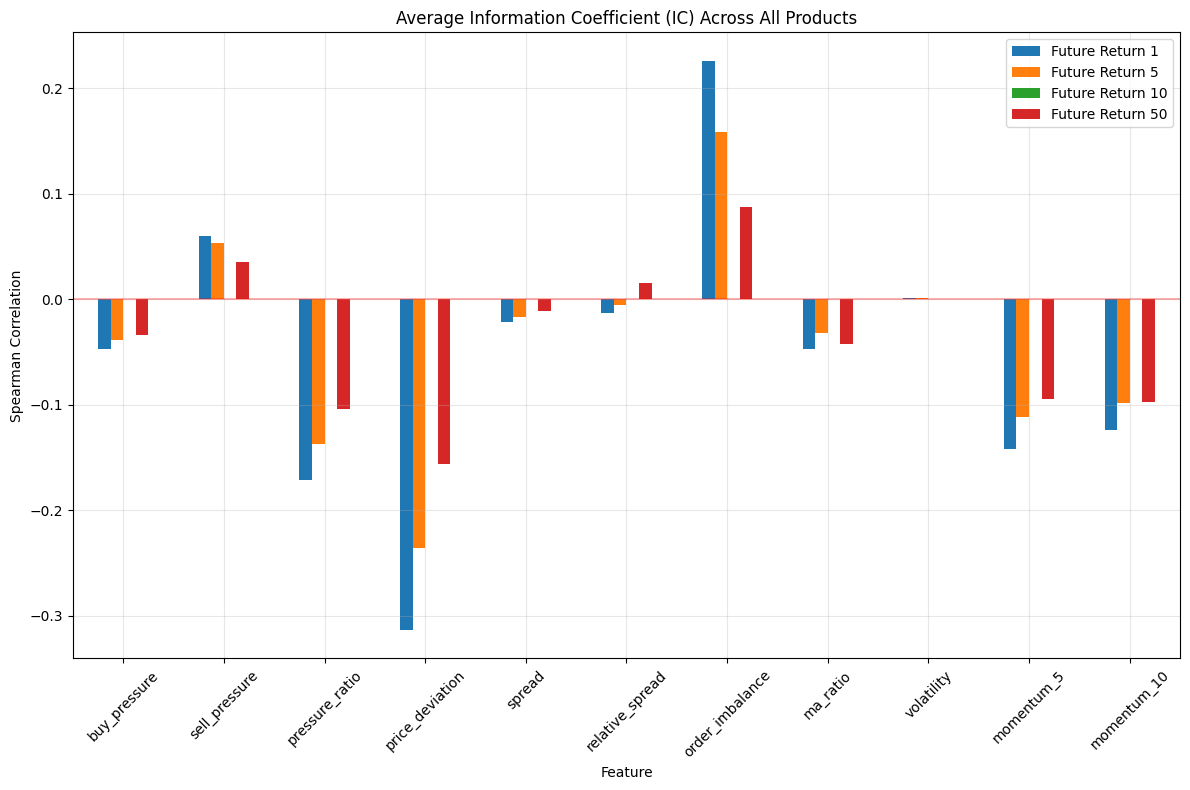

In [17]:
# 导入需要的库
import numpy as np
from scipy.stats import spearmanr

# 按产品分组并为每个产品计算特征
def create_features(df):
    features = pd.DataFrame()
    
    # 按产品分组
    for product in products:
        product_data = df[df['product'] == product].copy()
        
        # 计算买卖压力因子
        product_data['buy_pressure'] = product_data['bid_volume_1'] + product_data['bid_volume_2'] + product_data['bid_volume_3']
        product_data['sell_pressure'] = product_data['ask_volume_1'] + product_data['ask_volume_2'] + product_data['ask_volume_3']
        product_data['pressure_ratio'] = product_data['buy_pressure'] / (product_data['sell_pressure'] + 1e-10)
        
        # 计算价格偏离度因子
        product_data['price_deviation'] = (product_data['mid_price'] - product_data['mid_depth_price']) / product_data['mid_depth_price']
        
        # 计算价差因子
        product_data['spread'] = product_data['ask_price_1'] - product_data['bid_price_1']
        product_data['relative_spread'] = product_data['spread'] / product_data['mid_price']
        
        # 计算不平衡因子
        product_data['order_imbalance'] = (product_data['bid_volume_1'] - product_data['ask_volume_1']) / (product_data['bid_volume_1'] + product_data['ask_volume_1'] + 1e-10)
        
        # 计算移动平均和相对强度
        product_data['ma_5'] = product_data['mid_price'].rolling(5).mean()
        product_data['ma_10'] = product_data['mid_price'].rolling(10).mean()
        product_data['ma_ratio'] = product_data['ma_5'] / (product_data['ma_10'] + 1e-10)
        
        # 计算波动率
        product_data['volatility'] = product_data['return'].rolling(10).std()
        
        # 计算价格动量
        product_data['momentum_5'] = product_data['mid_price'].pct_change(5)
        product_data['momentum_10'] = product_data['mid_price'].pct_change(10)
        
        # 添加产品标识符并合并到特征数据框
        product_data['product'] = product
        
        # 保存特征
        if features.empty:
            features = product_data
        else:
            features = pd.concat([features, product_data])
    
    # 填充缺失值
    features = features.fillna(0)
    return features

# 应用特征创建函数
features_df = create_features(price)

# 计算未来收益率作为目标变量（一阶价格变化）
features_df['future_return_1'] = features_df.groupby('product')['mid_price'].shift(-1) / features_df['mid_price'] - 1
features_df['future_return_5'] = features_df.groupby('product')['mid_price'].shift(-5) / features_df['mid_price'] - 1
features_df['future_return_50'] = features_df.groupby('product')['mid_price'].shift(-50) / features_df['mid_price'] - 1

# 删除缺失的目标变量
features_df = features_df.dropna(subset=['future_return_1', 'future_return_5', 'future_return_50'])

# 计算因子与未来收益率之间的IC值
def calculate_ic(features_df, feature_cols, target_cols):
    ic_results = {}
    
    for product in products:
        product_data = features_df[features_df['product'] == product]
        
        product_ic = {}
        for feature in feature_cols:
            feature_ic = {}
            for target in target_cols:
                # 计算Spearman相关系数
                if len(product_data) > 0:
                    ic, p_value = spearmanr(product_data[feature], product_data[target], nan_policy='omit')
                    feature_ic[target] = ic
                else:
                    feature_ic[target] = np.nan
            product_ic[feature] = feature_ic
        ic_results[product] = product_ic
    
    return ic_results

# 定义特征列和目标列
feature_cols = ['buy_pressure', 'sell_pressure', 'pressure_ratio', 
                'price_deviation', 'spread', 'relative_spread',
                'order_imbalance', 'ma_ratio', 'volatility',
                'momentum_5', 'momentum_10']

target_cols = ['future_return_1', 'future_return_5', 'future_return_50']

# 计算IC值
ic_results = calculate_ic(features_df, feature_cols, target_cols)

# 可视化IC结果
def visualize_ic(ic_results, product, ax):
    ic_df = pd.DataFrame({
        'Feature': [],
        'Future Return 1': [],
        'Future Return 5': [],
        'Future Return 50': []
    })
    
    for feature, targets in ic_results[product].items():
        ic_df = pd.concat([ic_df, pd.DataFrame({
            'Feature': [feature],
            'Future Return 1': [targets['future_return_1']],
            'Future Return 5': [targets['future_return_5']],
            'Future Return 50': [targets['future_return_50']]
        })], ignore_index=True)
    
    ic_df = ic_df.set_index('Feature')
    
    ic_df.plot(kind='bar', ax=ax)
    ax.set_title(f' {product}')
    ax.set_ylabel('Spearman Correlation')
    ax.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    return ic_df

# 创建一个大图，包含所有产品的子图
fig, axes = plt.subplots(1, len(products), figsize=(24, 8))
fig.suptitle(' All Products', fontsize=16)

# 为每个产品可视化IC
for ax, product in zip(axes, products):
    visualize_ic(ic_results, product, ax)

plt.tight_layout()
plt.show()

# 计算平均IC
def calculate_avg_ic(ic_results):
    avg_ic = {}
    for feature in feature_cols:
        feature_ic = {}
        for target in target_cols:
            ics = [
                ic_results[product][feature][target]
                for product in products
            ]
            feature_ic[target] = np.mean(ics)
        avg_ic[feature] = feature_ic
    return avg_ic

avg_ic = calculate_avg_ic(ic_results)
avg_ic_df = pd.DataFrame(columns=['Feature', 'Future Return 1', 'Future Return 5', 'Future Return 10'])

for feature, targets in avg_ic.items():
    avg_ic_df = pd.concat([avg_ic_df, pd.DataFrame({
        'Feature': [feature],
        'Future Return 1': [targets['future_return_1']],
        'Future Return 5': [targets['future_return_5']],
        'Future Return 50': [targets['future_return_50']]
    })], ignore_index=True)

avg_ic_df = avg_ic_df.set_index('Feature')

plt.figure(figsize=(12, 8))
avg_ic_df.plot(kind='bar', figsize=(12, 8))
plt.title('Average Information Coefficient (IC) Across All Products')
plt.ylabel('Spearman Correlation')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

print("\nAverage IC Across All Products:")
print(avg_ic_df)